# Project 4, APS1070 Winter 2022
#### **Linear Regression -  14 points**
**Deadline: April 1st, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Ningcan Sun
*   Your **student number**: 1003270435



### How to submit **(HTML [This notebook] + IPYNB + GitHub [Part 7])**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.

7. Make sure you compeleted the last part on <font color='red'>**GitHub**</font> and added your link to the last cell here. The teaching team will view and grade your part 7 on GitHub.



Ref: https://stackoverflow.com/a/64487858 



## Part 1 - Getting Started [1 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

In [2]:
#1.1 Print the dataframe.
df.head()

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,...,0.0,0.0,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006


In [3]:
#1.2.1 Using train_test_split
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0

# first let the train + validation be 85%, test be the 15%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
# second we seperate the 15% from 85% be the validation 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15/0.85, random_state=1)


In [4]:
X_val

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
7510,209,-18,-0.20,-0.05,0.55,-0.5,-6,5,-0.002,-0.2,...,0.000,0.0,0.000,0.0,0.000,0.0,0.001,0.0,0.8,0.027
12561,307,-19,-0.03,0.10,0.30,2.5,-3,-14,-0.006,0.2,...,0.000,0.0,0.000,0.0,0.000,0.0,0.001,0.0,0.6,0.020
849,-229,-53,0.30,0.02,1.51,-1.3,-13,3,0.012,-0.2,...,0.000,0.0,0.000,0.0,-0.004,0.0,-0.004,0.0,1.2,0.042
9191,-55,-21,-0.38,0.06,0.59,0.7,-10,-3,-0.001,-0.2,...,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019
8351,-257,-44,-0.24,-0.07,0.70,-0.5,-6,6,0.007,0.5,...,0.000,0.0,0.000,0.0,0.000,0.0,-0.002,0.0,0.5,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11358,222,-70,0.32,0.03,0.37,0.4,-8,3,-0.009,-1.5,...,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.020
1760,-118,-19,-0.46,-0.01,0.63,-0.4,-10,5,-0.003,0.0,...,0.000,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.018
5426,-539,-26,-0.49,0.10,1.04,0.7,-15,-4,0.003,0.8,...,0.000,0.0,-0.002,0.0,0.000,0.0,0.000,0.0,0.6,0.020
612,-321,0,-0.48,0.05,0.82,-0.3,-12,-3,-0.004,0.2,...,0.000,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.018


In [5]:
# 1.2.2  Standardize the data using StandardScaler from sklearn.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_val_scaled = pd.DataFrame(scaler.transform(X_val))

X_train_scaled.columns = X_train.columns
X_test_scaled.columns = X_test.columns
X_val_scaled.columns = X_val.columns

In [6]:
# 1.2.3 Insert the first column of all  1 s in the training, validation, and test set.

# for training set 
X_train_scaled['First_column']=1
cols = list(X_train_scaled.columns)
cols = [cols[-1]] + cols[:-1]
X_train_scaled = X_train_scaled[cols]

# for testing set 
X_test_scaled['First_column']=1
cols = list(X_test_scaled.columns)
cols = [cols[-1]] + cols[:-1]
X_test_scaled = X_test_scaled[cols]

# for val set 
X_val_scaled['First_column']=1
cols = list(X_val_scaled.columns)
cols = [cols[-1]] + cols[:-1]
X_val_scaled = X_val_scaled[cols]


#print the training set 
X_train_scaled

,First_column,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,...,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
0,1,0.300454,-0.585755,1.129531,0.917832,0.600308,0.449172,-0.945470,-0.392270,0.223766,...,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,1.398352,1.427740
1,1,-1.025053,0.758921,0.244951,1.339421,1.456453,-0.892745,-0.705563,-1.255174,-0.227281,...,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,0.892517,0.999244
2,1,0.626084,-0.777851,0.277713,-1.105794,-0.985146,1.274966,1.213696,0.950026,-0.753503,...,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,-0.624988,-0.857570
3,1,0.020795,-0.047884,0.638098,1.508056,0.410053,1.171742,0.014159,-2.213957,-1.881121,...,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,0.892517,0.713581
4,1,-0.258864,-0.163142,0.638098,-0.852841,0.219799,-0.892745,0.254066,1.141782,-0.527979,...,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,-0.119153,-0.000579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9619,1,0.143385,-0.047884,-0.770679,0.243290,1.488162,0.242723,-1.185377,0.278878,1.652082,...,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,2.410022,2.570395
9620,1,-0.684099,0.297889,-0.344770,0.074654,1.044235,0.449172,-0.705563,-1.063418,-1.054201,...,-1.639085,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,0.892517,0.570749
9621,1,1.430583,-0.777851,1.457154,1.086467,-1.207110,0.139499,0.014159,-1.446931,-0.828677,...,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,-0.119153,-0.286243
9622,1,0.580113,-0.701012,1.555441,-0.346935,0.314926,0.345947,-0.705563,0.758269,0.825162,...,1.952980,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,1.398352,1.284908


### 1.3 Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? 

##### Epoch is number of times that your whole data go through the neural network, the difference between these two is the Iteration is the times that pass using the batch size. For example in the mini-batch and SGD, we need to split the batch size. If we divided into 5 mini-batch, so there is 5 iteration per epoch.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note:** You should use **``scipy.linalg.inv``** to perform the matrix inversion, as ``numpy.linalg.inv`` may cause numerical issues.

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [7]:
# Change the df to array
X_train_array =np.array(X_train_scaled)
y_train_array = np.array(y_train)

X_val_array =np.array(X_val_scaled)
y_val_array = np.array(y_val)


y_test_array = np.array(y_test)

In [8]:
# Define RMSE function
from sklearn.metrics import mean_squared_error
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

# for training RMSE
from scipy import linalg
import scipy
W = np.dot(scipy.linalg.inv(np.dot(X_train_array.T, X_train_array)), np.dot(X_train_array.T, y_train_array))
yPred = np.dot(X_train_array, W)
print('RMSE training: ', rmse(yPred, y_train_array))

# for validation RMSE
yPred_val = np.dot(X_val_array, W)
print('RMSE validation: ', rmse(yPred_val, y_val_array))
RMSE_validation=rmse(yPred_val, y_val_array)

RMSE training:  0.00018781953559552243
RMSE validation:  0.00018203231331176327


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

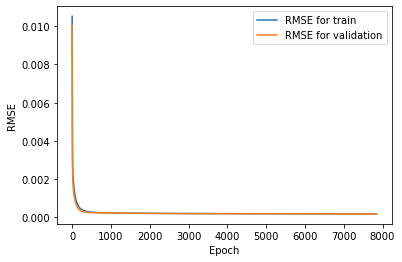

--- Total Training Time: 28.773525953292847 (s) ---


In [9]:
import time
start_time = time.time() ## Records current time

import matplotlib.pyplot as plt
import math
lr=0.01
CT=1.001*RMSE_validation
rmse_array_train = []
rmse_array_val = []
w = np.random.uniform(0,0.001,41)
# original rmse for validation set
y_train_array=y_train_array.reshape((9624,1))
rmse_val=rmse(np.dot(X_val_scaled, w.T),y_val)


while rmse_val>CT:
    # train rmse
    y_train_predict= np.dot(X_train_scaled,w.T).reshape (-1,1)
    rmse_train =rmse(y_train_predict,y_train)
    rmse_array_train.append(rmse(y_train_predict,y_train))
    # val rmse
    y_val_predict= np.dot(X_val_scaled,w.T).reshape (-1,1)
    rmse_val =rmse(y_val_predict,y_val)
    rmse_array_val.append(rmse_val)
    # gradient
    gradient = (1/len(y_train_predict) * np.dot(X_train_scaled.T, y_train_predict-y_train_array)).reshape(1,-1)
    w = w - lr * gradient ### weight update
    
plt.plot(rmse_array_train,label = 'RMSE for train')
plt.plot(rmse_array_val,label = 'RMSE for validation')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.show()

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

### 3.4 Comment 

##### It is not overfit or underfit, the reason is these two line are really close to each other,  so it is a  good fit of the model.

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [10]:
def mini_batch (X_train, X_val, y_train, y_val, batch_size, lr, CT):
    lr=0.01
    CT=1.001*RMSE_validation
    rmse_array_train = []
    rmse_array_val = []
    w = np.random.uniform(0,0.001,41)
    # original rmse for validation set
    y_train_array_1=y_train.reshape((9624,1))
    rmse_val=rmse(np.dot(X_val, w.T),y_val)
    RMSE_train = []
    RMSE_val = []
    total_time_sum = []
    # set a start time
    start_time=time.time()
    # start 0
    iteration = 0
    while rmse_val>CT:
        ### batchsize* run的遍数 <6000
        permutation = np.random.permutation(9624) # the number of observation of the training data is 9624
        X_train_scaled_permutation = X_train.loc[permutation,:] # reorder the train data
        y_train_array_permutation = y_train[permutation]
        
        # batch size is the number of size for each batch
        # bs is number of the batch, such as batch 1 or batch 2
        # find the best w
        for bs in range(0,9624, batch_size):
            # 加一个iteration， 一个里面 有9624/batch size 个iteration
            iteration+=1
            if bs + batch_size>9624: # if it is the last batch
                X_batch_permutation = X_train_scaled_permutation.iloc[9624-batch_size:9624, :]
                y_batch_permutation = y_train_array_permutation[9624-batch_size:9624, :]
            else: # if it is not the last batch
                X_batch_permutation = X_train_scaled_permutation.iloc[bs:bs+batch_size, :]
                y_batch_permutation = y_train_array_permutation[bs:bs+batch_size, :]
            
            # train rmse
            y_batch_permutation_predict= np.dot(X_batch_permutation,w.T).reshape (-1,1)
            
            gradient = (1/len(y_batch_permutation_predict) * np.dot(X_batch_permutation.T, y_batch_permutation_predict-y_batch_permutation)).reshape(1,-1)
            w = w - lr * gradient ### weight update
        if iteration >20000:
           return 'It','is','diverge','!!'
        
        y_train_scaled_permutation_final = np.dot(X_train_scaled_permutation,w.T).reshape (-1,1)
        rmse_train = rmse(y_train_scaled_permutation_final,y_train_array_permutation)
        RMSE_train.append(rmse_train)
        
        y_val_scaled_permutation_final = np.dot(X_val,w.T).reshape (-1,1)
        rmse_val = rmse(y_val_scaled_permutation_final,y_val)
        
        RMSE_val.append(rmse_val)
        total_time = time.time()-start_time
        total_time_sum.append(total_time)
        
        
        #if rmse_val>5*max(RMSE_val[-20:]):
            #print('DIVERGE!!!!!!')
            #break
    
    
    return w, RMSE_train, RMSE_val,total_time_sum

In [11]:
w_2, RMSE_train_2, RMSE_val_2,total_time_2 =mini_batch(X_train_scaled, X_val_scaled, y_train_array, y_val_array, 2, 0.01, 1.001*RMSE_validation)
w_2, RMSE_train_2, RMSE_val_2,total_time_2

('It', 'is', 'diverge', '!!')

In [12]:
w_4, RMSE_train_4, RMSE_val_4,total_time_4 =mini_batch(X_train_scaled, X_val_scaled, y_train_array, y_val_array, 4, 0.01, 1.001*RMSE_validation)
w_4, RMSE_train_4, RMSE_val_4,total_time_4

('It', 'is', 'diverge', '!!')

In [13]:
w_8, RMSE_train_8, RMSE_val_8,total_time_8 =mini_batch(X_train_scaled, X_val_scaled, y_train_array, y_val_array, 8, 0.01, 1.001*RMSE_validation)
w_8, RMSE_train_8, RMSE_val_8,total_time_8

('It', 'is', 'diverge', '!!')

In [14]:
w_16, RMSE_train_16, RMSE_val_16,total_time_16 =mini_batch(X_train_scaled, X_val_scaled, y_train_array, y_val_array, 16, 0.01, 1.001*RMSE_validation)
w_16, RMSE_train_16, RMSE_val_16,total_time_16

('It', 'is', 'diverge', '!!')

In [15]:
#w_16, RMSE_train_16, RMSE_val_16,total_time_16 =mini_batch(X_train_scaled, X_val_scaled, y_train_array, y_val_array, 16, 0.01, 1.001*RMSE_validation)
w_128, RMSE_train_128, RMSE_val_128,total_time_128 =mini_batch(X_train_scaled, X_val_scaled, y_train_array, y_val_array, 128, 0.01, 1.001*RMSE_validation)
w_256, RMSE_train_256, RMSE_val_256,total_time_256=mini_batch(X_train_scaled, X_val_scaled, y_train_array, y_val_array, 256, 0.01, 1.001*RMSE_validation)
w_512, RMSE_train_512, RMSE_val_512,total_time_512=mini_batch(X_train_scaled, X_val_scaled, y_train_array, y_val_array, 512, 0.01, 1.001*RMSE_validation)
w_1024, RMSE_train_1024, RMSE_val_1024, total_time_1024=mini_batch(X_train_scaled, X_val_scaled, y_train_array, y_val_array, 1024, 0.01, 1.001*RMSE_validation)


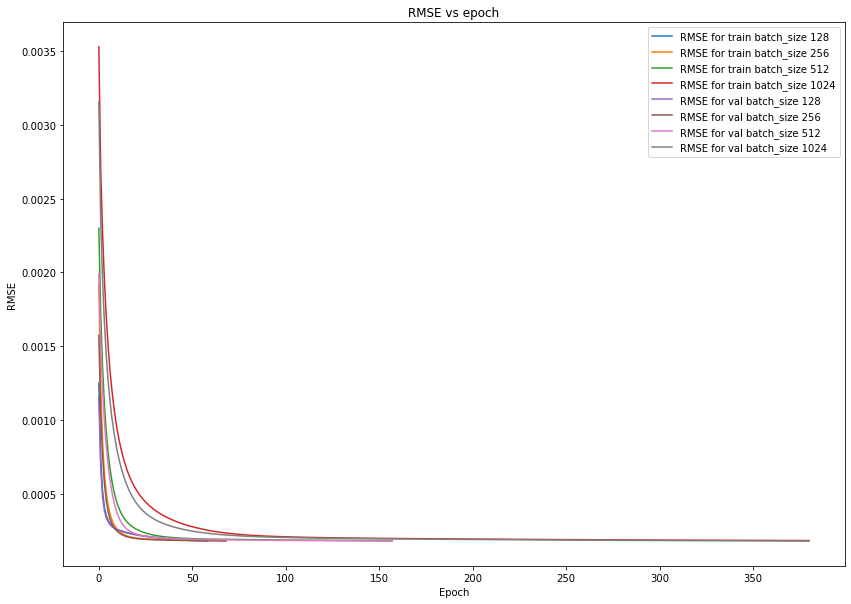

In [16]:
plt.figure(figsize=(14,10))
plt.title('RMSE vs epoch')

#plt.plot(RMSE_train_16,label = 'RMSE for train batch_size 16')
plt.plot(RMSE_train_128,label = 'RMSE for train batch_size 128')
plt.plot(RMSE_train_256,label = 'RMSE for train batch_size 256')
plt.plot(RMSE_train_512,label = 'RMSE for train batch_size 512')
plt.plot(RMSE_train_1024,label = 'RMSE for train batch_size 1024')

#plt.plot(RMSE_train_16,label = 'RMSE for train batch_size 16')
plt.plot(RMSE_val_128,label = 'RMSE for val batch_size 128')
plt.plot(RMSE_val_256,label = 'RMSE for val batch_size 256')
plt.plot(RMSE_val_512,label = 'RMSE for val batch_size 512')
plt.plot(RMSE_val_1024,label = 'RMSE for val batch_size 1024')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("RMSE")

plt.show()



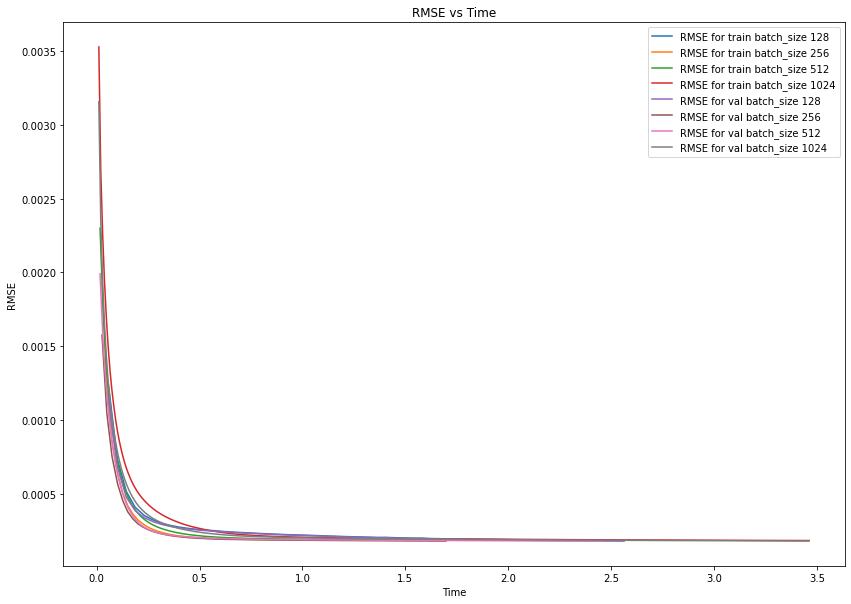

In [17]:
plt.figure(figsize=(14,10))
plt.title('RMSE vs Time')

#plt.plot(total_time_16,RMSE_train_16,label = 'RMSE for train batch_size 16')
plt.plot(total_time_128,RMSE_train_128,label = 'RMSE for train batch_size 128')
plt.plot(total_time_256,RMSE_train_256,label = 'RMSE for train batch_size 256')
plt.plot(total_time_512,RMSE_train_512,label = 'RMSE for train batch_size 512')
plt.plot(total_time_1024,RMSE_train_1024,label = 'RMSE for train batch_size 1024')

#plt.plot(total_time_16,RMSE_val_16,label = 'RMSE for val batch_size 16')
plt.plot(total_time_128,RMSE_val_128,label = 'RMSE for val batch_size 128')
plt.plot(total_time_256,RMSE_val_256,label = 'RMSE for val batch_size 256')
plt.plot(total_time_512,RMSE_val_512,label = 'RMSE for val batch_size 512')
plt.plot(total_time_1024,RMSE_val_1024,label = 'RMSE for val batch_size 1024')
plt.legend()
plt.xlabel("Time")
plt.ylabel("RMSE")

plt.show()

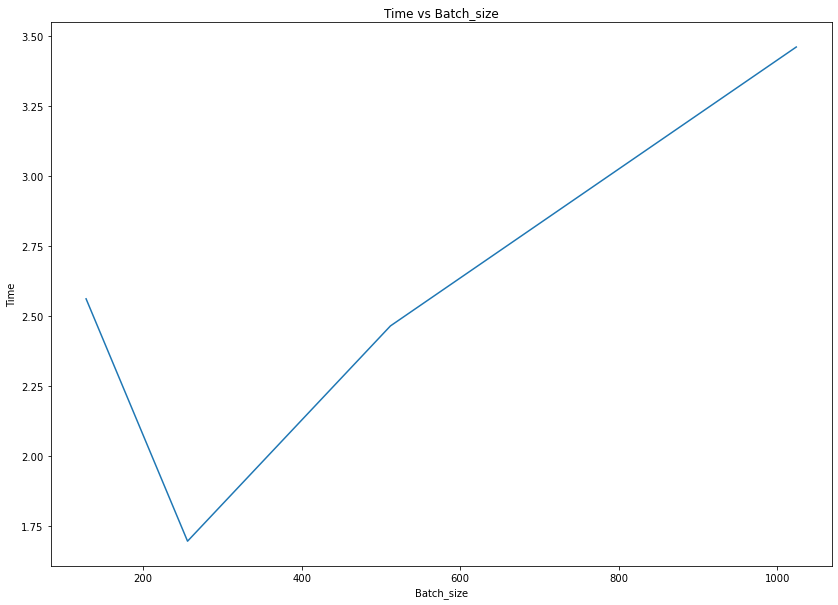

In [18]:
time_batch = {'batch': [128, 256,512,1024], 'time': [total_time_128[-1], total_time_256[-1],total_time_512[-1],total_time_1024[-1]]}
time_batch_df = pd.DataFrame(data=time_batch)

#Plot Total training time (y-axis) vs. Batch size (x-axis)
plt.figure(figsize=(14,10))
plt.title('Time vs Batch_size')

plt.plot(time_batch_df.batch, time_batch_df.time)

plt.xlabel("Batch_size")
plt.ylabel("Time")

plt.show()

### 4.4 Findings 

##### As the batch size increase, the running time first decrease and then increase, the RMSE for training data and validation data are really similiar, which means it is a good model. As the epoch increase, at begining, it drop dramatically, after epoch around 30, it deacrease very slow. More time will usually has lower RMSE. Also for the batch size is small, it is diverage, but if the batch size > 36, it will become converge. More batch size should take more time

## Part 5 - Gradient Descent Learning Rate [2 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batchsize that are not converging with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batchsize. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[0.5]**

2. Select the best batchsize based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[0.5]**

In [19]:
## 5.1

batch_size = 8
w_sum_for_each_learning=[]
RMSE_train_sum_for_each_learning=[]
RMSE_val_sum_for_each_learning=[]
total_time_sum_for_each_learning=[]

lr = [0.00001,0.0001,0.001,0.01,0.1,1,3,5,10]
for what_learning_rate in lr:
    w, RMSE_train, RMSE_val,total_time_sum=mini_batch(X_train_scaled, X_val_scaled, y_train_array, y_val_array, 32, what_learning_rate, 1.001*RMSE_validation)
    
    w_sum_for_each_learning.append(w)
    RMSE_train_sum_for_each_learning.append(RMSE_train)
    RMSE_val_sum_for_each_learning.append(RMSE_val)
    total_time_sum_for_each_learning.append(total_time_sum)
    
    
    

In [20]:
RMSE_val_sum_for_each_learning

['diverge',
 'diverge',
 'diverge',
 'diverge',
 'diverge',
 'diverge',
 'diverge',
 'diverge',
 'diverge']

In [21]:
## 5.2
learning_rate=[0.00001,0.0001,0.001,0.01,0.1]
w_sum = []
RMSE_train_sum=[]
RMSE_val_sum=[]
total_time_sum_sum=[]
for j in learning_rate:
    w, RMSE_train, RMSE_val,total_time_sum=mini_batch(X_train_scaled, X_val_scaled, y_train_array, y_val_array, 128, learning_rate, 1.001*RMSE_validation)
    w_sum.append(w)
    RMSE_train_sum.append(RMSE_train)
    RMSE_val_sum.append(RMSE_val)
    total_time_sum_sum.append(total_time_sum)
    


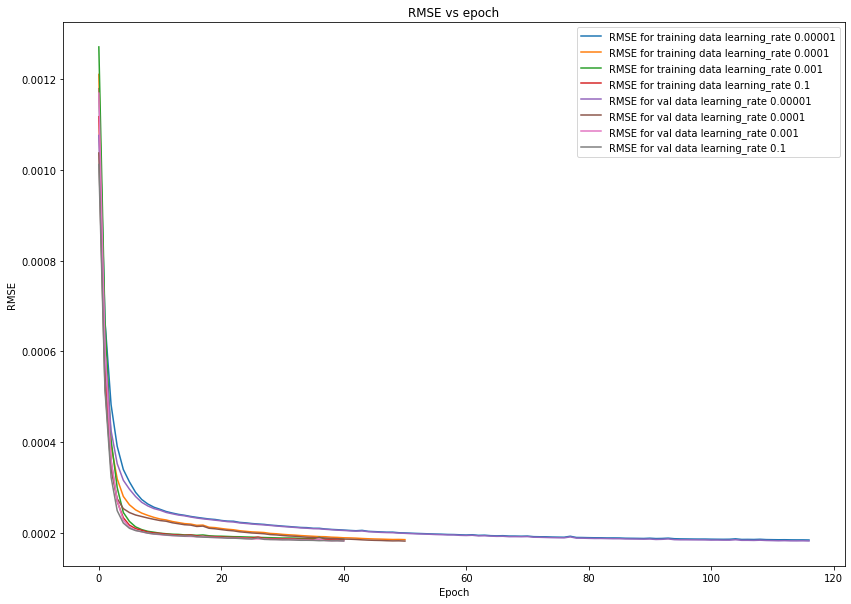

In [22]:
plt.figure(figsize=(14,10))
plt.title('RMSE vs epoch')


plt.plot(RMSE_train_sum[1],label = 'RMSE for training data learning_rate 0.00001')
plt.plot(RMSE_train_sum[2],label = 'RMSE for training data learning_rate 0.0001')
plt.plot(RMSE_train_sum[3],label = 'RMSE for training data learning_rate 0.001')
plt.plot(RMSE_train_sum[4],label = 'RMSE for training data learning_rate 0.1')

#plt.plot(RMSE_train_16,label = 'RMSE for train batch_size 16')
plt.plot(RMSE_val_sum[1],label = 'RMSE for val data learning_rate 0.00001')
plt.plot(RMSE_val_sum[2],label = 'RMSE for val data learning_rate 0.0001')
plt.plot(RMSE_val_sum[3],label = 'RMSE for val data learning_rate 0.001')
plt.plot(RMSE_val_sum[4],label = 'RMSE for val data learning_rate 0.1')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("RMSE")

plt.show()



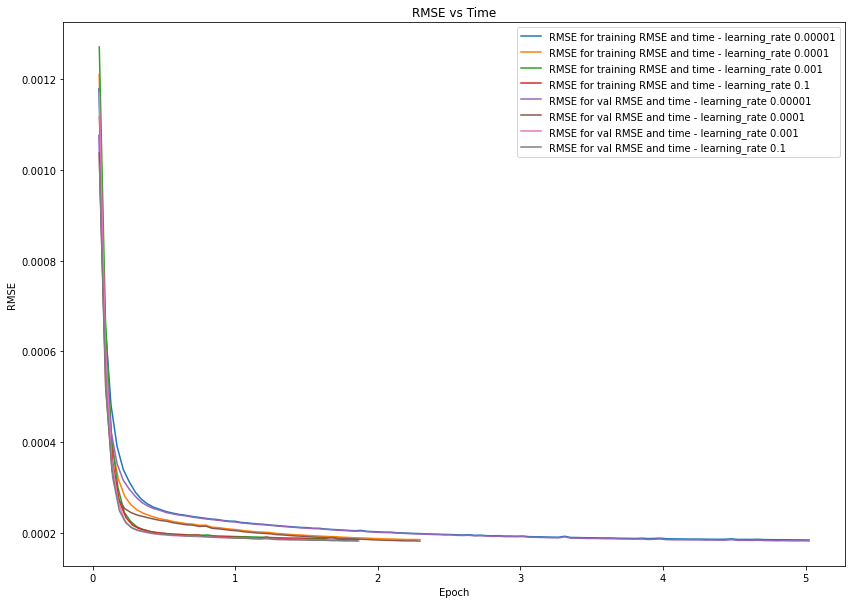

In [23]:
plt.figure(figsize=(14,10))
plt.title('RMSE vs Time')


plt.plot(total_time_sum_sum[1],RMSE_train_sum[1],label = 'RMSE for training RMSE and time - learning_rate 0.00001')
plt.plot(total_time_sum_sum[2],RMSE_train_sum[2],label = 'RMSE for training RMSE and time - learning_rate 0.0001')
plt.plot(total_time_sum_sum[3],RMSE_train_sum[3],label = 'RMSE for training RMSE and time - learning_rate 0.001')
plt.plot(total_time_sum_sum[4],RMSE_train_sum[4],label = 'RMSE for training RMSE and time - learning_rate 0.1')

#plt.plot(RMSE_train_16,label = 'RMSE for train batch_size 16')
plt.plot(total_time_sum_sum[1],RMSE_val_sum[1],label = 'RMSE for val RMSE and time - learning_rate 0.00001')
plt.plot(total_time_sum_sum[2],RMSE_val_sum[2],label = 'RMSE for val RMSE and time - learning_rate 0.0001')
plt.plot(total_time_sum_sum[3],RMSE_val_sum[3],label = 'RMSE for val RMSE and time - learning_rate 0.001')
plt.plot(total_time_sum_sum[4],RMSE_val_sum[4],label = 'RMSE for val RMSE and time - learning_rate 0.1')

plt.legend()
plt.xlabel("Epoch")
plt.ylabel("RMSE")

plt.show()

### 5.2.3 Finding
#### when the learning rate decrease, then the rmse decrease slowly, for example, when the learning rate decrease from 0.1 to 0.0001, the RMSE decrease. Also for the different learning rate, as the learning rate decrease, the number of epoch decrease. 

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 

In [24]:
w_128, RMSE_train_128, RMSE_val_128,total_time_128 =mini_batch(X_train_scaled, X_val_scaled, y_train_array, y_val_array, 128, 0.01, 1.001*RMSE_validation)
w_128

array([[-8.74214262e-04,  2.61006613e-04,  1.36862881e-07,
        -1.28098258e-04,  2.64820387e-04,  3.39804436e-04,
        -8.46448890e-05,  3.45990149e-04,  1.59396518e-04,
         3.45220298e-05,  1.05483445e-04, -5.63764217e-05,
         5.71453414e-05,  2.46194082e-04,  1.34124884e-04,
        -2.62812753e-05, -3.37864843e-04, -1.17119890e-04,
         3.00338885e-04,  3.32693491e-04, -5.70515375e-04,
         5.33064698e-05,  2.10004620e-04,  1.38590337e-05,
        -4.27736153e-04,  3.09606438e-06,  1.81730386e-06,
        -8.56844531e-06, -4.26914209e-06, -2.01644069e-05,
         4.72231826e-06, -1.67085971e-06, -9.00664008e-07,
        -3.86522565e-05,  1.27809440e-06, -8.26438876e-06,
        -1.22897090e-06, -2.41808395e-05,  5.84174726e-07,
        -1.43951887e-05, -2.14090739e-04]])

In [25]:
y_test_predict = np.dot(X_test_scaled, w_128.T)
rmse(y_test_predict,y_test_array)

0.00017932428875542785

In [26]:
print ('The RMSE for test data is ',rmse(y_test_predict,y_test_array))

The RMSE for test data is  0.00017932428875542785


### 6.1 Briefly describe your model selections/settings
#### The batch size I choose is 128, because it has lowe batch size, lower running time and will give lowest RMSE. Also the learning rate is 0.01, then it will also decrease the rmse, so that the reason I would like to use

### 6.2 Summarize the performance of your model for the task of managing ailerons of an aircraft.
#### When the batch size is 128, learning rate is 0.01, the RMSE for test data is 0.00017843, which is a really good fit!

## Part 7 - Getting started with Github  [3 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 6. In this part you will be completing some additional coding tasks using a different dataset and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac: 
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/5dxrAjOj to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS-1070-2021/project4_git-*********
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

 
 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/APS-1070-2021/project4_git-*********
```


 5. A new folder should be created in your directory similar to:
```
C:\aps1070\project4_git-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions. 

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded. 

 8. To submit your work, follow: 
```
cd <your assignment folder>
git add W22_Project_4_git.ipynb
git commit -m “Final Submission”
git push 
```
If you had any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or 
git push origin HEAD:main
```

 9. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.** 

**Private Repository Link :** https://github.com/APS-1070-2021/project4_git-21breed.git **[3 marks]**